In [6]:
# pip install xlrd
# pip install missingno
# pip install matplotlib
# pip install seaborn
import pandas as pd
import numpy as np
from collections import Counter
from sklearn import preprocessing
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy.special import boxcox1p
import seaborn as sns
%matplotlib inline
# windows下配置 font 为中文字体，自己去该路径找到自己电脑自带的字体
# myfont = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
# mac下配置 font 为中文字体，自己找到自己电脑自带的字体
# myfont = FontProperties(fname="/System/Library/Fonts/Supplemental/simsun.ttc")
# plt.rcParams['font.sans-serif'] = [myfont.get_name()]  # 中文字体设置-宋体
# plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font=myfont.get_name())  # 解决Seaborn中文显示问题

DATA_PATH ='./plant.xlsx'
data=pd.read_excel(DATA_PATH)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/System/Library/Fonts/Supplemental/simsun.ttc'

In [17]:
# pip install xlrd
# pip install missingno
# pip install matplotlib
# pip install seaborn
import pandas as pd
import numpy as np
from collections import Counter
from sklearn import preprocessing
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy.special import boxcox1p
import seaborn as sns

%matplotlib inline
# windows下配置 font 为中文字体，自己去该路径找到自己电脑自带的字体
myfont = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
plt.rcParams['font.sans-serif'] = [myfont.get_name()]  # 中文字体设置-宋体
plt.rcParams['axes.unicode_minus'] = False #解决负号显示问题
# mac下配置 font 为中文字体，自己找到自己电脑自带的字体
# myfont = FontProperties(fname="/System/Library/Fonts/Supplemental/simsun.ttc")
# plt.rcParams['font.sans-serif'] = [myfont.get_name()]  # 中文字体设置-宋体
# plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font=myfont.get_name())  # 解决Seaborn中文显示问题

DATA_PATH ='./plant.xlsx'
data=pd.read_excel(DATA_PATH)
data.head()
data

,中文名,花色,花瓣长度,花瓣宽度,植株高度,叶序,种子直径
0,木犀,白,2.0,1.6,5.0,单叶,3.0
1,南天竹,白,4.0,3.2,1.0,复叶,3.0
2,火棘,白,2.0,1.6,2.0,单叶,4.0
3,绣球,蓝,8.0,6.4,0.3,单叶,NaN
4,桃,粉,12.0,9.6,4.0,单叶,50.0
5,银杏,NaN,NaN,NaN,11.0,单叶,20.0
6,接骨草,白,2.0,1.6,1.0,单叶,2.0
7,天竺葵,NaN,10.0,8.0,0.3,单叶,4.0
8,黄鹌菜,黄,8.0,6.4,0.2,单叶,1.0
9,蜀葵,粉,30.0,24.0,0.2,单叶,3.0


In [14]:
data.shape

(22, 7)

In [15]:
data.describe()

,花瓣长度,花瓣宽度,植株高度,种子直径
count,20.000000,20.00000,22.000000,20.000000
mean,15.000000,12.00000,2.990909,11.350000
std,22.131188,17.70495,3.220457,11.815578
min,2.000000,1.60000,0.200000,1.000000
25%,4.750000,3.80000,0.475000,3.000000
50%,8.500000,6.80000,2.000000,6.500000
75%,13.000000,10.40000,4.750000,16.250000
max,100.000000,80.00000,11.000000,50.000000


In [16]:
#列级别的判断,但凡某一列有null值或空的，则为真
data.isnull().any()

#将列中为空或者null的个数统计出来，并将缺失值最多的排前
total = data.isnull().sum().sort_values(ascending=False)
print(total)

#输出百分比：
percent =(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

花色      3
种子直径    2
花瓣宽度    2
花瓣长度    2
叶序      0
植株高度    0
中文名     0
dtype: int64


,Total,Percent
花色,3,0.136364
种子直径,2,0.090909
花瓣宽度,2,0.090909
花瓣长度,2,0.090909
叶序,0,0.000000
植株高度,0,0.000000
中文名,0,0.000000


In [18]:
data.duplicated().sum()

2

In [19]:
data.drop_duplicates() #如果要真正改变原始数据，要data= 

,中文名,花色,花瓣长度,花瓣宽度,植株高度,叶序,种子直径
0,木犀,白,2.0,1.6,5.0,单叶,3.0
1,南天竹,白,4.0,3.2,1.0,复叶,3.0
2,火棘,白,2.0,1.6,2.0,单叶,4.0
3,绣球,蓝,8.0,6.4,0.3,单叶,NaN
4,桃,粉,12.0,9.6,4.0,单叶,50.0
5,银杏,NaN,NaN,NaN,11.0,单叶,20.0
6,接骨草,白,2.0,1.6,1.0,单叶,2.0
7,天竺葵,NaN,10.0,8.0,0.3,单叶,4.0
8,黄鹌菜,黄,8.0,6.4,0.2,单叶,1.0
9,蜀葵,粉,30.0,24.0,0.2,单叶,3.0


In [25]:
data.columns
id_col=['中文名']
cat_col=['花色','叶序']
cont_col=['花瓣长度','花瓣宽度','植株高度','种子直径']
display(data[cat_col])
display(data[cont_col])

,花色,叶序
0,白,单叶
1,白,复叶
2,白,单叶
3,蓝,单叶
4,粉,单叶
5,NaN,单叶
6,白,单叶
7,NaN,单叶
8,黄,单叶
9,粉,单叶


,花瓣长度,花瓣宽度,植株高度,种子直径
0,2.0,1.6,5.0,3.0
1,4.0,3.2,1.0,3.0
2,2.0,1.6,2.0,4.0
3,8.0,6.4,0.3,NaN
4,12.0,9.6,4.0,50.0
5,NaN,NaN,11.0,20.0
6,2.0,1.6,1.0,2.0
7,10.0,8.0,0.3,4.0
8,8.0,6.4,0.2,1.0
9,30.0,24.0,0.2,3.0


In [28]:
# 去除缺失数据
data_1=data.dropna(axis=0)
data_1

,中文名,花色,花瓣长度,花瓣宽度,植株高度,叶序,种子直径
0,木犀,白,2.0,1.6,5.0,单叶,3.0
1,南天竹,白,4.0,3.2,1.0,复叶,3.0
2,火棘,白,2.0,1.6,2.0,单叶,4.0
4,桃,粉,12.0,9.6,4.0,单叶,50.0
6,接骨草,白,2.0,1.6,1.0,单叶,2.0
8,黄鹌菜,黄,8.0,6.4,0.2,单叶,1.0
9,蜀葵,粉,30.0,24.0,0.2,单叶,3.0
10,海桐,白,5.0,4.0,1.0,复叶,3.0
11,紫薇,粉,8.0,6.4,2.0,单叶,12.0
12,荷花玉兰,白,100.0,80.0,3.0,单叶,20.0


白    10
粉     4
蓝     1
黄     1
红     1
Name: 花色, dtype: int64
单叶    14
复叶     3
Name: 叶序, dtype: int64


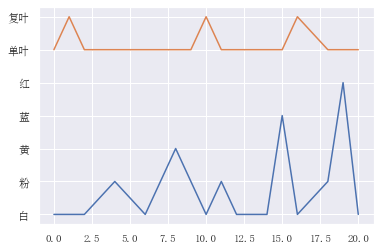

In [31]:
for i in cat_col:
    print(pd.Series(data_1[i]).value_counts())
    plt.plot(data_1[i])

In [32]:
# 对于离散型数据，对其获取哑变量
dummies=pd.get_dummies(data[cat_col])
dummies
# 如果有很多种，就会导致数据量变大，学随机森林时会知道增加了随机森林的深度

,花色_白,花色_粉,花色_红,花色_蓝,花色_黄,叶序_单叶,叶序_复叶
0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1
2,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0
4,0,1,0,0,0,1,0
5,0,0,0,0,0,1,0
6,1,0,0,0,0,1,0
7,0,0,0,0,0,1,0
8,0,0,0,0,1,1,0
9,0,1,0,0,0,1,0


In [39]:
a=[1,2,3,4,5,6,73,5,32,9,56]
m1=np.mean(a)
m2=np.std(a)
a=(a-m1)/(m2-m1)
a

array([-2.84539912, -2.67621323, -2.50702734, -2.33784144, -2.16865555,
       -1.99946965,  9.33598523, -2.16865555,  2.39936359, -1.49191197,
        6.45982504])

In [43]:
#偏度，是统计数据
# 计算偏度
skewed_feats = data[cont_col].apply( lambda x: (x.dropna()).skew() )#compute skewness
print(skewed_feats)
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

# 如果偏度很大，进行boxcoxlp变换
lam = 0.15
data_fill_na=data.fillna(data.mean())# 用平均值来填充缺失数据
data_fill_na[skewed_feats] = boxcox1p(data_fill_na[skewed_feats], lam)
skewed_feats

#对于连续型数据，对其进行标准化
#标准化过程
#(data[cont_col[0]]-np.mean(data[cont_col[0]]))/np.std(data[cont_col[0]])

scaled=preprocessing.scale(data_fill_na[cont_col])
scaled=pd.DataFrame(scaled,columns=cont_col)
scaled


花瓣长度    3.342545
花瓣宽度    3.342545
植株高度    1.480526
种子直径    1.990939
dtype: float64


,花瓣长度,花瓣宽度,植株高度,种子直径
0,-1.304894,-1.288750,0.903921,-0.925389
1,-0.819716,-0.819987,-0.589057,-0.925389
2,-1.304894,-1.288750,-0.066467,-0.688945
3,-0.213444,-0.221128,-1.110535,0.354451
4,0.193943,0.186091,0.638818,2.304452
5,0.434102,0.427321,1.980633,1.036298
6,-1.304894,-1.288750,-0.589057,-1.218769
7,0.006083,-0.002047,-1.110535,-0.688945
8,-0.213444,-0.221128,-1.203772,-1.611348
9,1.250907,1.251900,-1.203772,-0.925389


In [46]:
m=dummies.join(scaled)
data_cleaned=data[id_col].join(m)
data_cleaned.drop_duplicates()

,中文名,花色_白,花色_粉,花色_红,花色_蓝,花色_黄,叶序_单叶,叶序_复叶,花瓣长度,花瓣宽度,植株高度,种子直径
0,木犀,1,0,0,0,0,1,0,-1.304894,-1.288750,0.903921,-0.925389
1,南天竹,1,0,0,0,0,0,1,-0.819716,-0.819987,-0.589057,-0.925389
2,火棘,1,0,0,0,0,1,0,-1.304894,-1.288750,-0.066467,-0.688945
3,绣球,0,0,0,1,0,1,0,-0.213444,-0.221128,-1.110535,0.354451
4,桃,0,1,0,0,0,1,0,0.193943,0.186091,0.638818,2.304452
5,银杏,0,0,0,0,0,1,0,0.434102,0.427321,1.980633,1.036298
6,接骨草,1,0,0,0,0,1,0,-1.304894,-1.288750,-0.589057,-1.218769
7,天竺葵,0,0,0,0,0,1,0,0.006083,-0.002047,-1.110535,-0.688945
8,黄鹌菜,0,0,0,0,1,1,0,-0.213444,-0.221128,-1.203772,-1.611348
9,蜀葵,0,1,0,0,0,1,0,1.250907,1.251900,-1.203772,-0.925389


In [47]:
# 数据间的相关性
corrmat=data_cleaned.corr()
corrmat

,花色_白,花色_粉,花色_红,花色_蓝,花色_黄,叶序_单叶,叶序_复叶,花瓣长度,花瓣宽度,植株高度,种子直径
花色_白,1.000000,-0.430331,-0.199205,-0.288675,-0.288675,-0.279715,0.279715,-0.300409,-0.294563,-0.068065,-0.173080
花色_粉,-0.430331,1.000000,-0.102869,-0.149071,-0.149071,0.222222,-0.222222,0.167979,0.165340,-0.057832,0.154062
花色_红,-0.199205,-0.102869,1.000000,-0.069007,-0.069007,0.102869,-0.102869,0.094729,0.093249,0.022122,0.289422
花色_蓝,-0.288675,-0.149071,-0.069007,1.000000,-0.100000,0.149071,-0.149071,0.222603,0.222319,-0.032669,-0.136661
花色_黄,-0.288675,-0.149071,-0.069007,-0.100000,1.000000,-0.260875,0.260875,-0.134522,-0.136319,-0.238620,-0.198733
叶序_单叶,-0.279715,0.222222,0.102869,0.149071,-0.260875,1.000000,-1.000000,0.400612,0.399609,0.316699,0.127083
叶序_复叶,0.279715,-0.222222,-0.102869,-0.149071,0.260875,-1.000000,1.000000,-0.400612,-0.399609,-0.316699,-0.127083
花瓣长度,-0.300409,0.167979,0.094729,0.222603,-0.134522,0.400612,-0.400612,1.000000,0.999943,0.289797,0.298094
花瓣宽度,-0.294563,0.165340,0.093249,0.222319,-0.136319,0.399609,-0.399609,0.999943,1.000000,0.289203,0.295706
植株高度,-0.068065,-0.057832,0.022122,-0.032669,-0.238620,0.316699,-0.316699,0.289797,0.289203,1.000000,0.466142


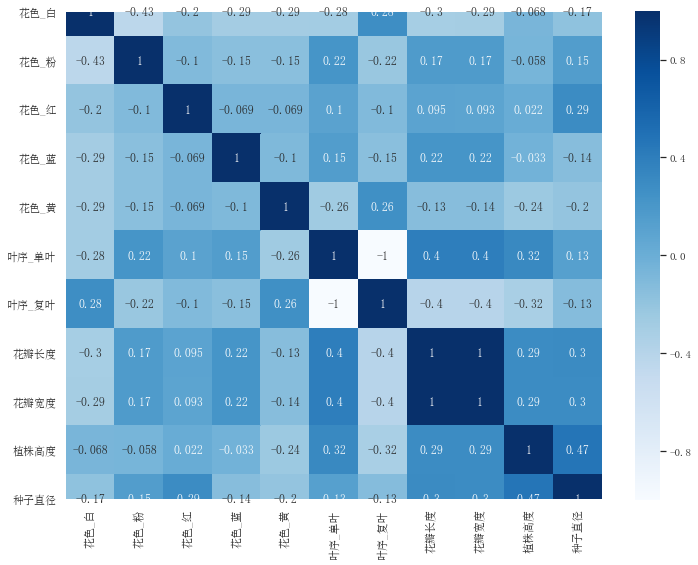

In [57]:
def corr_heat(df):
    dfData=df.corr()
    plt.subplots(figsize=(12,9))
    sns.heatmap(dfData, annot=True,vmax=1,square=True,cmap="Blues")
    # plt.savefig ('./BluesStateRelation.png')
    plt.show()

corr_heat(data_cleaned)

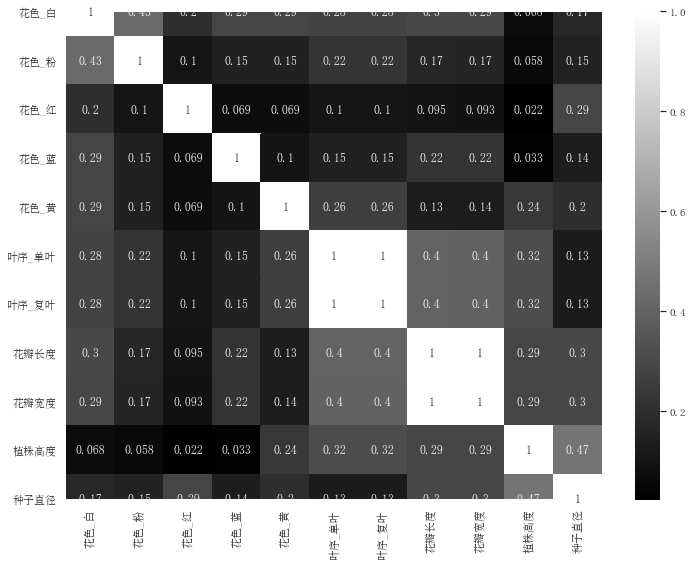

In [60]:
def corr_heat(df):
    dfData=abs(df.corr())
    plt.subplots(figsize=(12,9))
    sns.heatmap(dfData, annot=True,vmax=1,square=True,cmap=plt.cm.gray)
    plt.show()

corr_heat(data_cleaned)

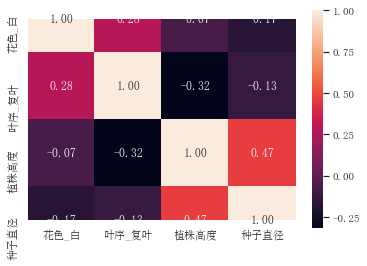

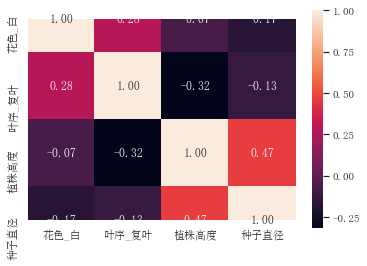

In [53]:
k = 4 #number of variables for heatmap
cols = corrmat.nlargest(k, '花色_白' )['花色_白'].index
cm = np.corrcoef(data_cleaned[ cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels =cols.values)
plt.show()